In [1]:
%%html
<style>
table {float:left}
</style>


<style>
table {float:left}
</style>

现给到北京线上某款视频APP在2018年1月-2018年7月的实际用户数据    
需要预测2018年8月-2019年12月的数据    
请基于课程中的案例分析，建立分析方案并给到预测的数据结果。



|日期          | 当月实际户数（户） |
| ----------- | -----------     |
| 2018.1      |              179|
| 2018.2      |              199|
| 2018.3      |              330|
| 2018.4      |              450|
| 2018.5      |              770|
| 2018.6      |              821|
| 2018.7      |              863|

### 分析方案
需求中历史数据量不多，且需要预测未来的数据量较多，不能单纯以历史数据来对未来数据进行预测，但需要外部其他变量辅助进行综合预测，以达到更高准确度;    
由于案例中缺乏具体背景信息，难以定位外部数据源，故采用线性回归模型进行数据拟合和检验，并完成最终的预测。

In [38]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

import statsmodels.api as sm


In [39]:
month = pd.period_range(start='201801', end='201912', freq='M')
idx = np.arange(1, 25)
users = np.vstack((np.array([179, 199, 330, 450, 770, 821, 863]).reshape(-1,1),  np.zeros((17,1))))
data = pd.DataFrame(columns=['month', 'index', 'users'])
data['month'] = month
data['index'] = idx
data['users'] = users
data

,month,index,users
0,2018-01,1,179.0
1,2018-02,2,199.0
2,2018-03,3,330.0
3,2018-04,4,450.0
4,2018-05,5,770.0
5,2018-06,6,821.0
6,2018-07,7,863.0
7,2018-08,8,0.0
8,2018-09,9,0.0
9,2018-10,10,0.0


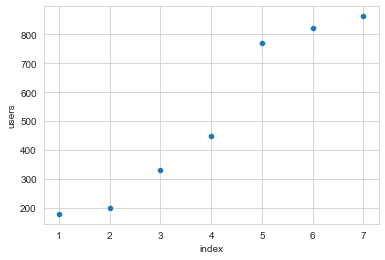

In [40]:
sns.scatterplot(x=data['index'][:7], y=data['users'][:7])
plt.show()

### 拟合线性回归模型

In [51]:
Y = data['users'][:7]
X = data['index'][:7]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

In [52]:
results.params

const    -17.714286
index    133.428571
dtype: float64

In [42]:
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  users   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     76.76
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           0.000321
Time:                        20:54:57   Log-Likelihood:                -39.480
No. Observations:                   7   AIC:                             82.96
Df Residuals:                       5   BIC:                             82.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.7143     68.108     -0.260      0.805    -192.791     157.363
index        133.4286     15.229      8.761      0.000      94.280     172.577
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.941
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.859
Skew:                           0.611   Prob(JB):                        0.651
Kurtosis:                       1.796   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 预测

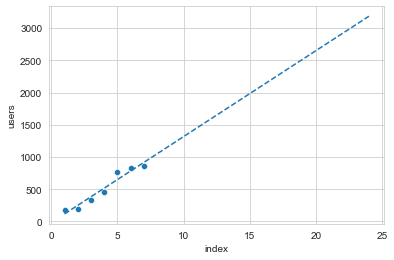

In [50]:
sns.scatterplot(x=data['index'][:7], y=data['users'][:7])

y_ = model.predict(results.params, sm.add_constant(data['index']))
sns.lineplot(x=x_, y=y_, linestyle="dashed")


plt.show()

In [55]:
model.predict(results.params, sm.add_constant(data['index']))

array([ 115.71428571,  249.14285714,  382.57142857,  516.        ,
        649.42857143,  782.85714286,  916.28571429, 1049.71428571,
       1183.14285714, 1316.57142857, 1450.        , 1583.42857143,
       1716.85714286, 1850.28571429, 1983.71428571, 2117.14285714,
       2250.57142857, 2384.        , 2517.42857143, 2650.85714286,
       2784.28571429, 2917.71428571, 3051.14285714, 3184.57142857])

In [56]:
data['users'][7:] = model.predict(results.params, sm.add_constant(data['index']))[7:]
data

<ipython-input-56-bd687ea69d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['users'][7:] = model.predict(results.params, sm.add_constant(data['index']))[7:]


,month,index,users
0,2018-01,1,179.000000
1,2018-02,2,199.000000
2,2018-03,3,330.000000
3,2018-04,4,450.000000
4,2018-05,5,770.000000
5,2018-06,6,821.000000
6,2018-07,7,863.000000
7,2018-08,8,1049.714286
8,2018-09,9,1183.142857
9,2018-10,10,1316.571429
